<h1 style="text-align: center;">Data Mining Project 3: Link Analysis</h1>

<p style="text-align:center;">
    呂伯駿<br>
    Q56074085<br>
    NetDB<br>
    National Cheng Kung University<br>
    pclu@netdb.csie.ncku.edu.tw
</p>


## 1. Introduction

本次報告的目的是觀察不同參數之 Graph 其 Hubs, authority, pageRank 與 Simrank 的變化，並透過增減 links 實驗了解參數對數值的影響。


## 2. Environment

這個部分我將會說明實驗所使用的環境與使用資料集。

### 2.1 System Preferences

實驗環境如下：
- <b>Operating System</b>: macOS High Mojave (10.14.1)
- <b>CPU</b>: 1.3 GHz Intel Core i5
- <b>Memory</b>: 8 GB 1600 MHz DDR3
- <b>Programming Language</b> : Python 3.6.2

由於所用之 Graph Data 最多僅有 5220 個Link，實驗環境記憶體足以符合實驗需求。

### 2.2 Dataset

#### 資料參數：

實驗使用 7 種 Graph，其 nodes 數目與 links 數目如下表：

| Graph ID   |     Nodes      |  Edges |
|----------|:-------------:|------:|
| 1 |  6 | 5  |
| 2 |  5 | 5  |
| 3 |  4 | 6  |
| 4 |  7 |  18 |
| 5 | 469  |  1102 |
| 6 |  1228 | 5220  |
| 7 |  2316 | 4714  |



## 3. Implementation

### 3.1 HITS




### 3.2 PageRank



### 3.3 SimRank



## 4. Analysis

### 4.1 Results


#### a. Graph 1




#### b. Graph 2



#### c. Graph 3


#### d. Graph 4

#### e. Graph 5

#### f. Graph 6


#### g. Graph 7



### 4.2 Methods to Increase hub, authority,  and PageRank

本小節嘗試透過增減 links 與 nodes 來增加 node 1 的 hub, authority, and PageRank。


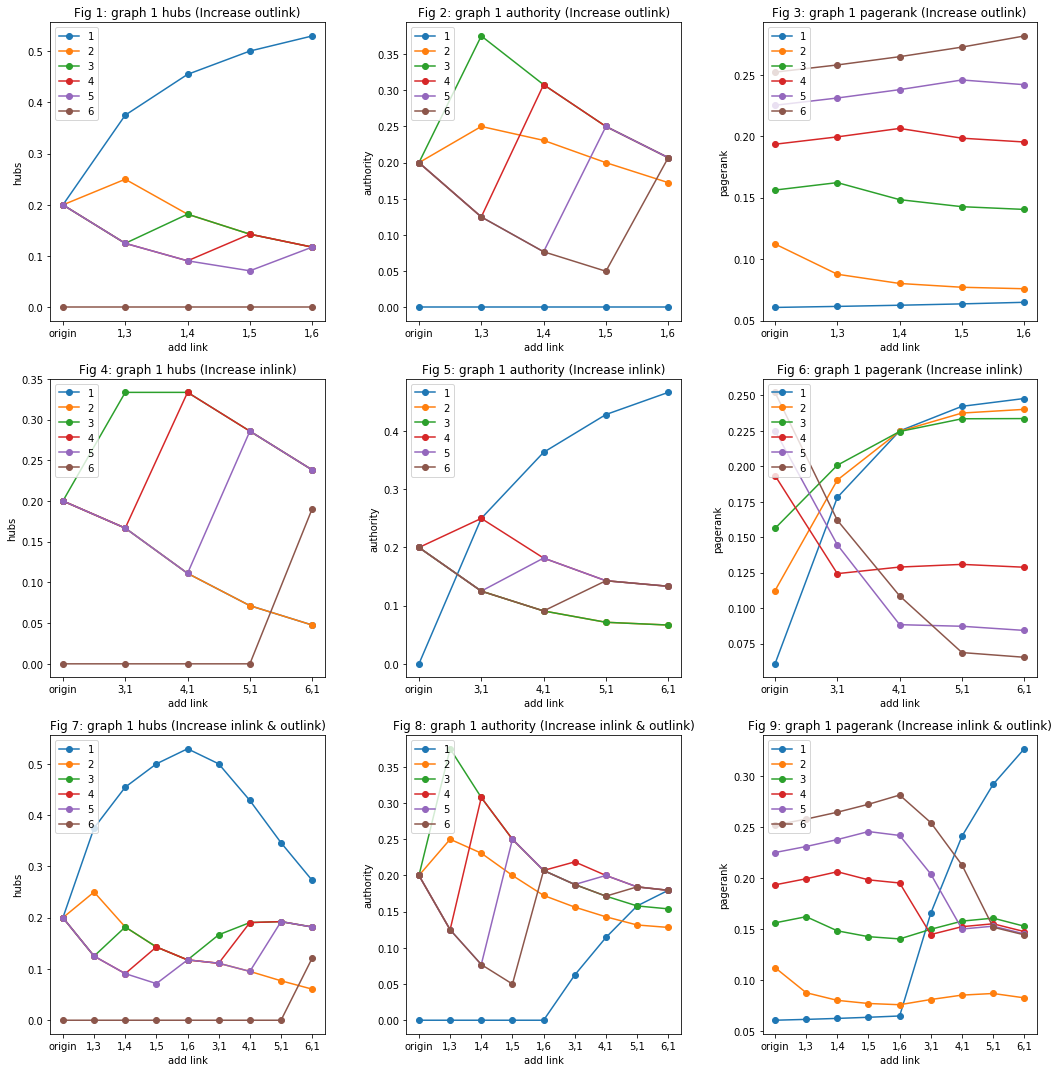

In [60]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 15))
def get_exp_data(graph_id):
    base_path = f'exp/graph_{graph_id}'
    return {
        'in': {
            'hubs': pd.read_csv(base_path + '/in/hubs.csv'),
            'authority': pd.read_csv(base_path + '/in/authority.csv'),
            'pagerank': pd.read_csv(base_path + '/in/pagerank.csv'),
        },
        'out': {
            'hubs': pd.read_csv(base_path + '/out/hubs.csv'),
            'authority': pd.read_csv(base_path + '/out/authority.csv'),
            'pagerank': pd.read_csv(base_path + '/out/pagerank.csv'),
        },
        'both': {
            'hubs': pd.read_csv(base_path + '/both/hubs.csv'),
            'authority': pd.read_csv(base_path + '/both/authority.csv'),
            'pagerank': pd.read_csv(base_path + '/both/pagerank.csv'),
        }
    }


def show_results(data, link_type, f1_config, index):
    value = f1_config['value']
    legends = f1_config['legends']
    title = f1_config['title']
    
    plt.subplot(index)
    x = list(data[link_type][value]['add_link'])
    x[0] = 'origin'

    # plot exp results
    for legend in legends:
        real_node = str(int(legend) - 1)
        y = data[link_type][value][real_node]
        plt.plot(x, y, 'o-')
    
    plt.xlabel('add link')
    plt.ylabel(value)
    plt.legend(legends, loc=2);
    plt.title(title);


def show_graph_results(legends, graph_id, fig_num):
    link_type = ['out', 'in', 'both']
    values = ['hubs', 'authority', 'pagerank']
    add_types = ['out', 'in', 'both']
    add_links = ['outlink', 'inlink', 'inlink & outlink']

    data = get_exp_data(graph_id)
    f_index = 331
    for type_id, add_type in enumerate(add_types):
        for id, value in enumerate(values):
           
            f_config = {
                'value': value,
                'legends': legends,
                'title': f'Fig {fig_num}: graph {graph_id} {value} (Increase {add_links[type_id]})'
            }
            show_results(data, add_type, f_config, str(f_index))
            fig_num += 1
            f_index += 1
        
#
# Fig 1 ~ Fig 9
#

legends = ['1','2','3','4','5','6']
show_graph_results(legends, 1, 1)

# Plot
plt.tight_layout()
plt.show()


#### a. Graph 1

此 graph 有 6 個 node，5 個 link，若不增減 node，則最多可再增加 25 條 link。

##### Increase outlinks of node 1
以 hub 為例，其 outlinks 且外連 node 的 authority 越高則 hub 越高。

若不斷增加 node 1 的 outlinks 數目，我們的確可以觀察到其 hub 數值隨之增加

Fig . 為增加 link 的結果，在原本的 graph 中，依序增加 '1,3', '1,4', '1,5', '1,6' 等link後各 node 的 hub 數值變化


...

此外也可以觀察到若只增加 node 1 的 outlink，則其 hub 的數值僅與外連 node 的數目有關，而與其外連的對象無關。

從 Fig . & Fig . 也可看到，在只增加 node 1 outlink 的情況下，其 authorities 並沒有變化，維持為 0，但 PageRank 會少量增加。

#####  Increase inlinks of node 1

Fig . 則是在原本的 graph 中，依序增加 '3,1', '4,1', '5,1', '6,1' 等link後各 node 的 hub 數值變化

...

從 Fig . & Fig 可發現，hub 會隨者 inlink 的數目增加而減少，但 PageRank 則會增加。

#####  Increase both outlinks & inlinks of node 1

實驗也比較兩種 link 同時增加的情況，若依序增加 '1,3', '1,4', '1,5', '1,6', '3,1', '4,1', '5,1', '6,1' 等link後

...

從 Fig . & Fig 可發現，node 1 的 hub 先增加後減少。 而 PageRank 在 inlink 加入後則會增加，最終達到只比增加 inlink 還高的數值。



In [ ]:
# Fig 10 ~ Fig 18
legends = ['1','2','3','4','5']
show_graph_results(legends, 2, 10)

# Plot
plt.tight_layout()
plt.show()

In [ ]:

#### b. Graph 2

#####  Increase outlinks of node 1

#####  Increase inlinks of node 1

#####  Increase both outlinks & inlinks of node 1

#### c. Graph 3

##### Increase outlinks of node 1

#####  Increase inlinks of node 1

#####  Increase both outlinks & inlinks of node 1

## 5. Conclusion


## 6. References

- [] Glen Jeh, Jennifer Widom. SimRank: A Measure of Structural-Context Similarity